# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.127504e+01     6.942000e+00
 * time: 0.004498958587646484
     1     2.809479e+01     3.977779e+00
 * time: 0.01936197280883789
     2     1.946275e+01     4.003867e+00
 * time: 0.03809690475463867
     3     1.313237e+01     3.153412e+00
 * time: 0.056793928146362305
     4     1.255008e+01     3.514930e+00
 * time: 0.07196402549743652
     5     1.217909e+01     3.364499e+00
 * time: 0.08773994445800781
     6     1.064140e+01     2.428218e+00
 * time: 0.10336089134216309
     7     9.130147e+00     1.375257e+00
 * time: 0.11871194839477539
     8     8.429640e+00     7.000752e-01
 * time: 0.13388586044311523
     9     8.237544e+00     4.119293e-01
 * time: 0.14902400970458984
    10     8.160295e+00     6.504776e-01
 * time: 0.16120004653930664
    11     8.117532e+00     7.090371e-01
 * time: 0.1731889247894287
    12     8.076165e+00     3.141769e-01
 * time: 0.18886399269104004
    13     8.043702e+00     4.123705e-01
 * time

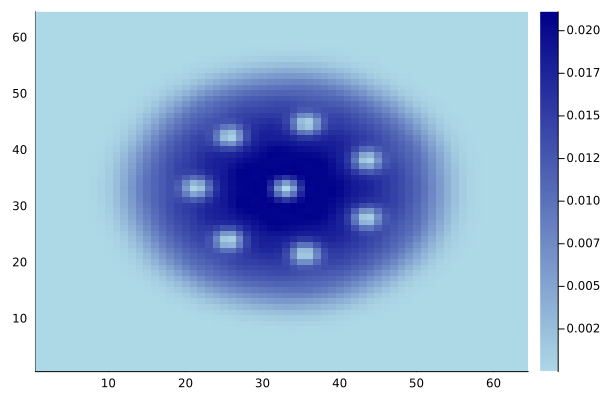

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)